Analysis of publicly available battery data from https://www.kaggle.com/datasets/ignaciovinuales/battery-remaining-useful-life-rul/data using RandomForest and LinearRegression models. Ensembles of each model and data reduction are explored.

Linear Regression is used as it is commonly applied to data sets across multiple disciplines. The battery community is no different and often uses simple regression models to analyze data. Here it is compared to a much more powerful mathematical decision tree network in Random Forest. Using this explainable algorithm that has little risk of overfitting and reduces the need for data preprocessing and can list out the most important features within a data set. Applying this model does not require the scaling step that some other models demand. 

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Battery_RUL.csv', sep = ',')
#print(data)

Printing useful information about this particular dataset and checking data types.

In [3]:
print(data.shape)

(15064, 9)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [5]:
data.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


Check for null values and if needed remove null values.

In [6]:
print(data.isnull().sum())

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64


Plot distribution of Remaining Useful Life (URL).

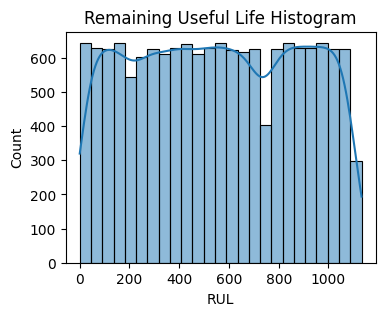

In [7]:
plt.figure(figsize=(4, 3))
plt.title('Remaining Useful Life Histogram')
sns.histplot(data.RUL, kde=True)
plt.show()

Check correlation matrix to identify potential highly correlated features.

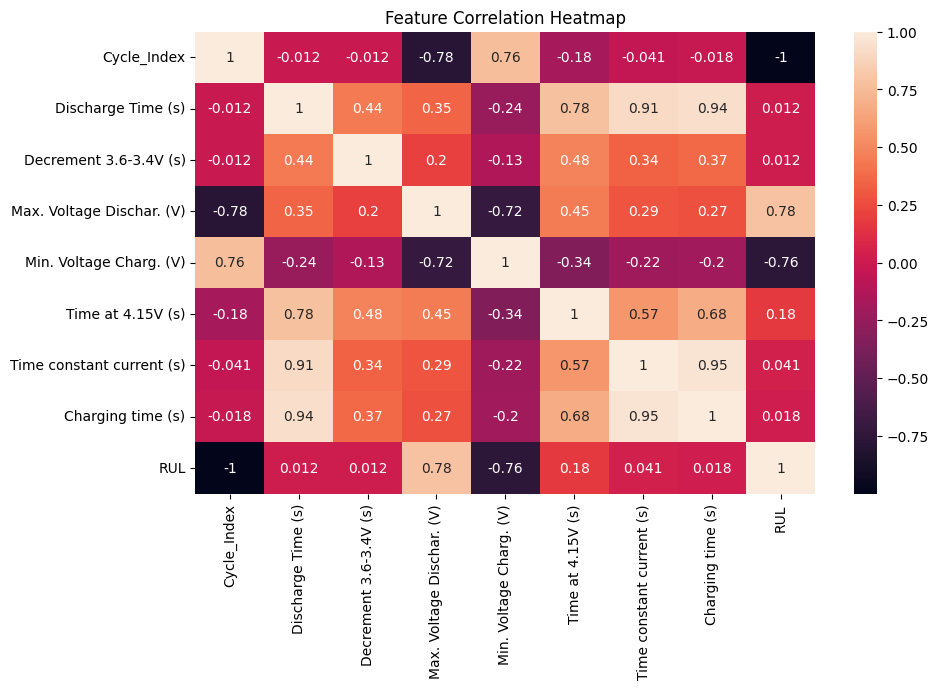

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

Correlation matrix identifies Time Constant Current (s) and Discharge Time (s) as well as Charging Time (s) and Discharge Time (s) as features with a correlation above 0.90. This is not surprising as a typical charge and discharge profile of a lithium-ion battery involved what is referred to as a CCCV regime. 

During CCCV cycling, the battery is supplied a fixed current, denoted in 'C-Rate' where 1C == 1 Full charge in 1 Hour. This is the CC (Constant Current) portion of the CCCV process. When the cell voltage reaches the defined cut-off voltage, the cell is not fully charged due to the over-potential that inherently exists in electrochemical during ion-transport phenomenons. To rectify this lack of full charge, a constant potential hold, is applied to the cell until the control current falls below a predefined limit. This limit is typically defined as C/20 or 1/20th the current required to charge the cell in one hour. This is the CV (Constant Voltage) part of CCCV.

These steps are usually time limited and the rate is dictated by the characteristics of the active material and active material loading. Consequently the time spent in the CC step and CV step are inherently related to the experimental design and should display this correlation. 

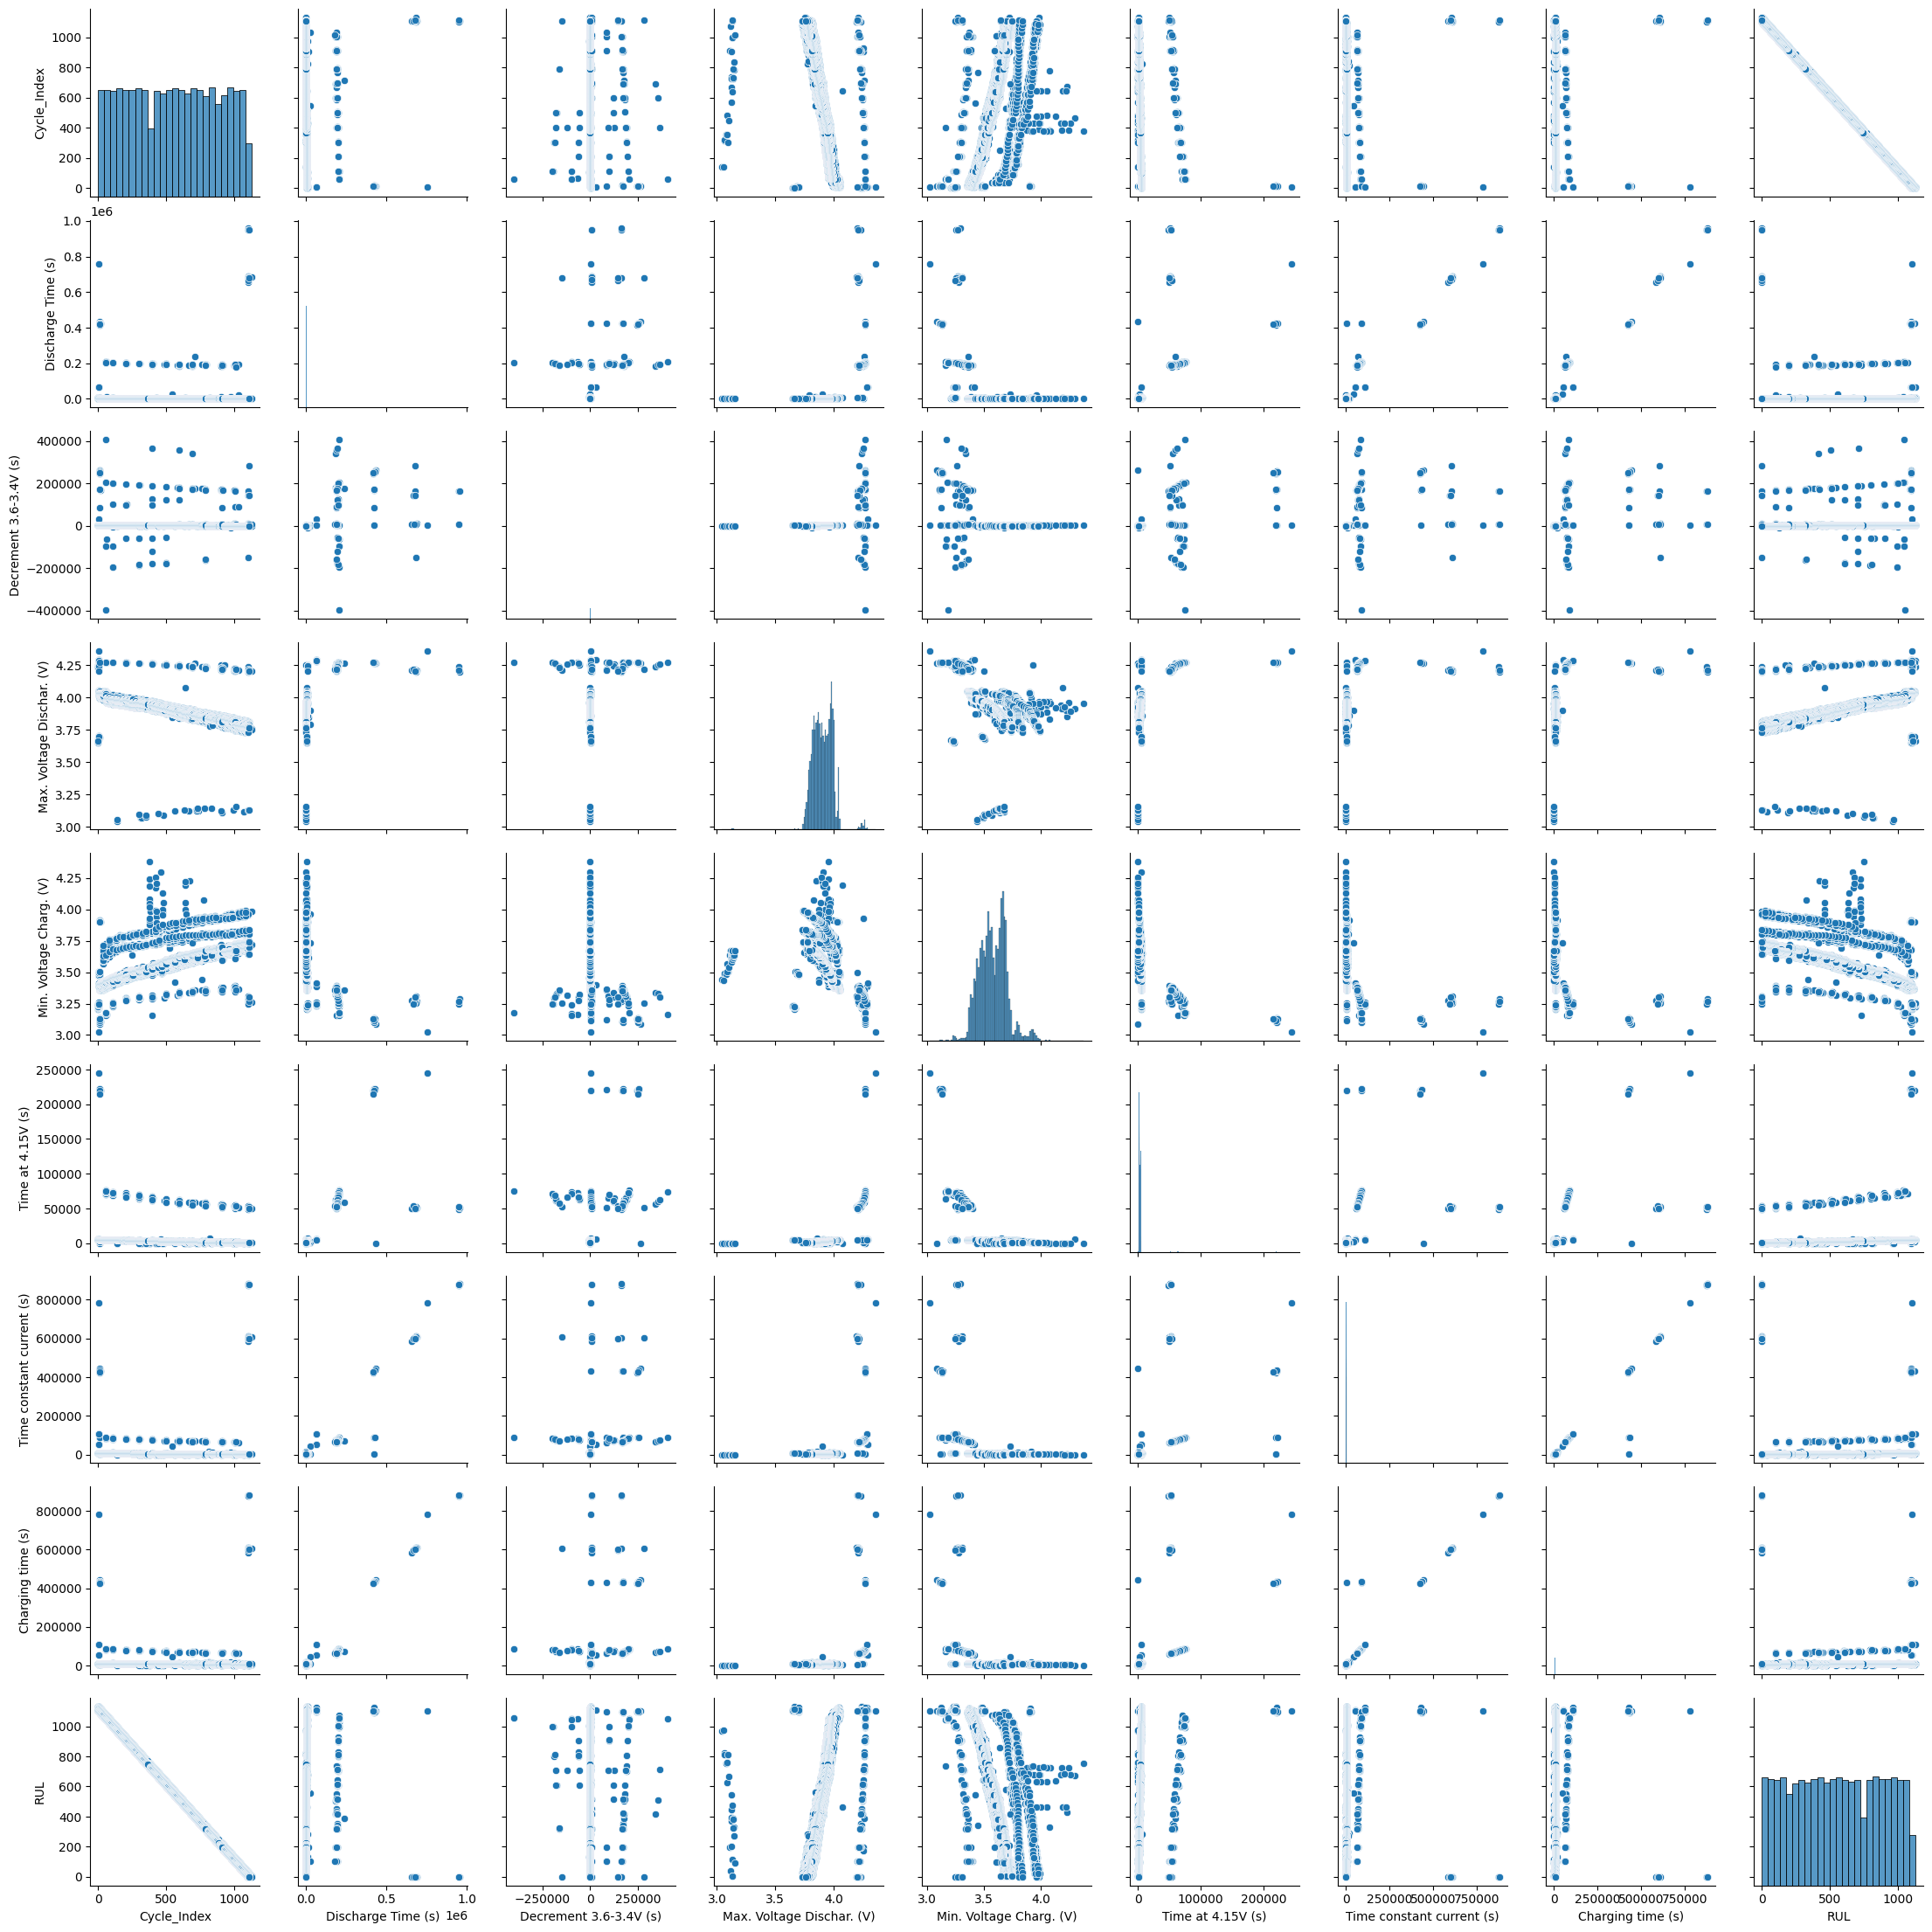

In [9]:
sns.pairplot(data)

In [10]:
y = data['RUL'].copy()
X = data.copy()
X = X.drop('RUL', axis = 1)

In [11]:
#print(y)

In [12]:
#print(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
rf = RandomForestRegressor(n_estimators= 1000, random_state = 42).fit(X_train, y_train)

In [15]:
pred = rf.predict(X_test)

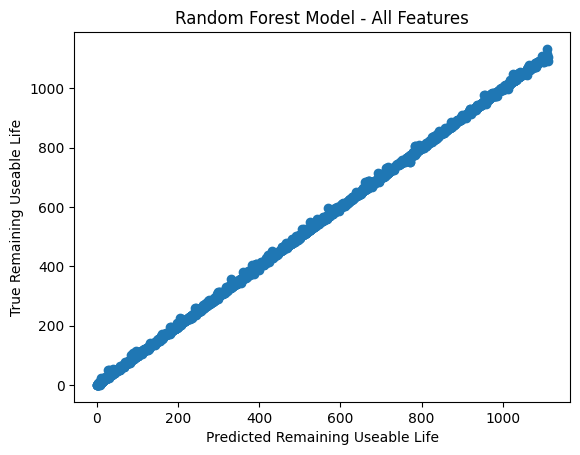

In [16]:
plt.title('Random Forest Model - All Features')
plt.xlabel('Predicted Remaining Useable Life')
plt.ylabel('True Remaining Useable Life')
plt.scatter(pred, y_test)

In [17]:
r2 = r2_score(y_test, pred)
importance = rf.feature_importances_

In [19]:
print('R^2 = ', r2)
importance_scores = pd.DataFrame(data = importance)
importance_scores = importance_scores.transpose()
importance_scores.columns = X.columns.to_list()


R^2 =  0.9998649173766121
   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0     0.999566             0.00006                0.000061   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                   0.000091                 0.000068            0.00005   

   Time constant current (s)  Charging time (s)  
0                   0.000031           0.000073  


Construct new model with cycle index removed to see impact of non-age related features on remaining useful life, denoted as 'trim'. Cycle Index is the most important feature for predicting Remaining Useful Life but is analogous to correlating age to mortality rate in a health data set. Removing this 'age' feature should highlight different features as important metrics to account for while doing cycle life testing. 

The result can be summarized as 'As the cell cycles more, the remaining life reduces'. This conclusion is likely true, but not useful from an industrial or academic perspective. Being able to identify a unique feature that dictates the remaining useful life would be of greater utility.

In [20]:
y_trim = data['RUL'].copy()
X_trim = data.copy()
X_trim = X_trim.drop(['RUL', 'Cycle_Index'], axis = 1)

In [21]:
X_trim_train, X_trim_test, y_trim_train, y_trim_test = train_test_split(X_trim, y_trim, test_size = 0.2, random_state = 42)

In [22]:
rf_trim = RandomForestRegressor(n_estimators= 1000, random_state = 42).fit(X_trim_train, y_trim_train)

In [23]:
pred_trim = rf_trim.predict(X_trim_test)

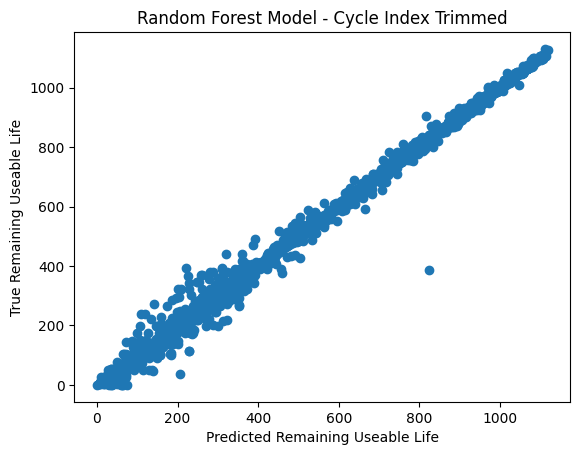

In [65]:
plt.title('Random Forest Model - Cycle Index Trimmed')
plt.xlabel('Predicted Remaining Useable Life')
plt.ylabel('True Remaining Useable Life')
plt.scatter(pred_trim, y_trim_test)

In [25]:
r2_trim = r2_score(y_trim_test, pred_trim)
importance_trim = rf_trim.feature_importances_

In [26]:
print('R^2 = ', r2_trim)
importance_scores_trim = pd.DataFrame(data = importance_trim)
importance_scores_trim = importance_scores_trim.transpose()
importance_scores_trim.columns = X_trim.columns.to_list()
print(importance_scores_trim)

R^2 =  0.9926755285249819
   Discharge Time (s)  Decrement 3.6-3.4V (s)  Max. Voltage Dischar. (V)  \
0            0.858117                0.083536                   0.017344   

   Min. Voltage Charg. (V)  Time at 4.15V (s)  Time constant current (s)  \
0                  0.00554           0.011598                   0.018715   

   Charging time (s)  
0           0.005149  


Dropping Cycle Index yields a much different result. This time Discharge Time is identified as the most important feature by an order of magnitude. This is also not surprising as the Discharge Time (s) is directly proportional to the Discharge Capacity (mAh) of the cell (which is not provided in this dataset). The Discharge Capacity normalized to the Initial Discharge Capacity, known as Normalized Discharge Capacity and presented as a percentage, is used to determine End of Life. Typically, End of Life is 80% of the Initial Discharge Capacity, which is obtained during pre-cycle life (Formation) testing. 

Try running in a for loop and compare results from full and trimmed data sets to validate the accuracy and importance score results. Here we can use an array to tune random_state to specific values, using this same technique across both RF runs and in the Linear Regression models will ensure the exact same splits and therefore the exact same data will be used to compare models. This removes the confounding 'randomness' from the train test split step and provides directly comparable results. N=20 for all models.

In [27]:
r2_trim_list = []
importance_trim_list = []
states = np.arange(0, 21, 1)
for i in range(0, 21):
    X_trim_train, X_trim_test, y_trim_train, y_trim_test = train_test_split(X_trim, y_trim, test_size = 0.2, random_state = states[i])
    rf_trim = RandomForestRegressor(n_estimators= 1000).fit(X_trim_train, y_trim_train)
    pred_trim = rf_trim.predict(X_trim_test)
    r2_trim_list.append(r2_score(y_trim_test, pred_trim))
    importance_trim_list.append(rf_trim.feature_importances_)

In [35]:
r2_full_list = []
importance_full_list = []
states = np.arange(0, 22, 1)
for i in range(0, 21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = states[i])
    rf = RandomForestRegressor(n_estimators= 1000).fit(X_train, y_train)
    pred = rf.predict(X_test)
    r2_full_list.append(r2_score(y_test, pred))
    importance_full_list.append(rf.feature_importances_)

In [36]:
print('R^2 for reduced data set = ', r2_trim)
importance_scores_trim = pd.DataFrame(data = importance_trim)
importance_scores_trim = importance_scores_trim.transpose()
importance_scores_trim.columns = X_trim.columns.to_list()
print('Importance Scores for Trimmed Data Set')
print(importance_scores_trim)

print('R^2 for full data set = ', r2)
importance_scores = pd.DataFrame(data = importance)
importance_scores = importance_scores.transpose()
importance_scores.columns = X.columns.to_list()
print('Importance Scores for Full Data Set')
print(importance_scores)

R^2 for reduced data set =  0.9926755285249819
Importance Scores for Trimmed Data Set
   Discharge Time (s)  Decrement 3.6-3.4V (s)  Max. Voltage Dischar. (V)  \
0            0.858117                0.083536                   0.017344   

   Min. Voltage Charg. (V)  Time at 4.15V (s)  Time constant current (s)  \
0                  0.00554           0.011598                   0.018715   

   Charging time (s)  
0           0.005149  
R^2 for full data set =  0.9998649173766121
Importance Scores for Full Data Set
   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0     0.999566             0.00006                0.000061   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                   0.000091                 0.000068            0.00005   

   Time constant current (s)  Charging time (s)  
0                   0.000031           0.000073  


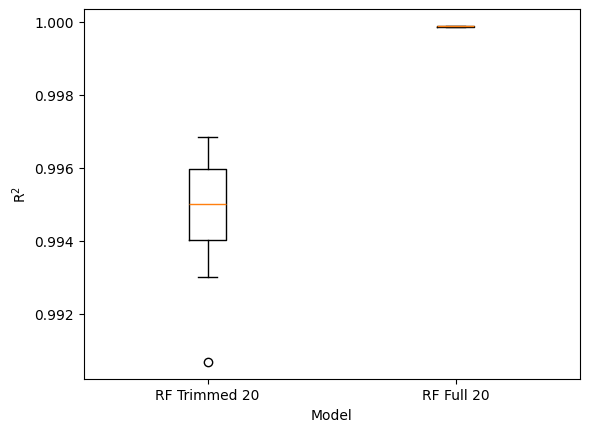

In [37]:
results = [r2_trim_list, r2_full_list]

fig, ax = plt.subplots()
labels = ['RF Trimmed 20', 'RF Full 20']
ax.set_ylabel(r'R$^{2}$')
ax.set_xlabel('Model')

bplot = ax.boxplot(results, tick_labels = labels, showfliers = True)

plt.show()

Removing the Cycle Index feature still results in a very accurate model and Discharge Time continues to be a highly important feature. This result will now be compared to a Linear Regression Model. 

In [67]:
r2_full_list_lr = []
coef_full_list = []
states = np.arange(0, 21, 1)
for i in range(0, 21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = states[i])
    linear_reg_Full = LinearRegression().fit(X_train, y_train)
    pipe_linear_reg_full = Pipeline([
        ("Scale", StandardScaler()),
        ("model", LinearRegression())
    ])
    pipe_linear_reg_full.fit(X_train, y_train)
    pred_linear_reg_full = pipe_linear_reg_full.predict(X_test)
    r2_full_list_lr.append(r2_score(y_test, pred_linear_reg_full))
    coef_full_list.append(linear_reg_Full.coef_)

In [90]:
r2_trim_list_lr = []
coef_trim_list = []
states = np.arange(0, 21, 1)
for i in range(0, 21):
    linear_reg_trim = LinearRegression().fit(X_trim, y_trim)
    pipe_linear_reg_trim = Pipeline([
        ("Scale", StandardScaler()),
        ("model", LinearRegression())
    ])
    X_trim_train, X_trim_test, y_trim_train, y_trim_test = train_test_split(X_trim, y_trim, test_size = 0.2, random_state = states[i])
    pipe_linear_reg_trim.fit(X_trim_train, y_trim_train)
    pred_linear_reg_trim = pipe_linear_reg_trim.predict(X_trim_test)
    r2_trim_list_lr.append(r2_score(y_test, pred_linear_reg_trim))
    coef_trim_list.append(linear_reg_trim.coef_)

In [91]:
print('R^2 for reduced data set = ', r2_trim_list_lr)

print('R^2 for full data set = ', r2_full_list_lr)

R^2 for reduced data set =  [-0.7484014857889465, -0.8217986480896553, -0.8540418333967326, -0.8383741308887194, -0.8203994500849106, -0.7793436523097994, -0.8228891707275103, -0.7738442410053694, -0.8632738301590639, -0.8208552088015117, -0.7679202099120164, -0.7249293375109533, -0.8068349676085396, -0.8214932569623865, -0.7720634686582863, -0.8166696437353718, -0.7309822515647428, -0.899227499152127, -0.8250555607558023, -0.719305797552096, 0.7973465039332519]
R^2 for full data set =  [0.9995014626466675, 0.9995359892327059, 0.9995502618349321, 0.9994929727684899, 0.9995012734150659, 0.9995439878140042, 0.9995111154923546, 0.9995234075990579, 0.9995168299114393, 0.9995095184448124, 0.9995019998812047, 0.9995277674214618, 0.9995573123644758, 0.9995376022217578, 0.9995260119224172, 0.9995057972336914, 0.9995269551310978, 0.9994890962143825, 0.9995095429439345, 0.9995125032878709, 0.9994954344613955]


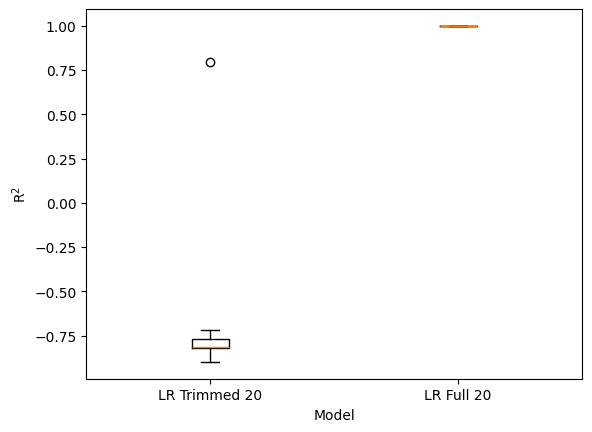

In [94]:
results = [r2_trim_list_lr, r2_full_list_lr]

fig, ax = plt.subplots()
labels = ['LR Trimmed 20', 'LR Full 20']
ax.set_ylabel(r'R$^{2}$')
ax.set_xlabel('Model')

bplot = ax.boxplot(results, tick_labels = labels, showfliers = True)

plt.show()

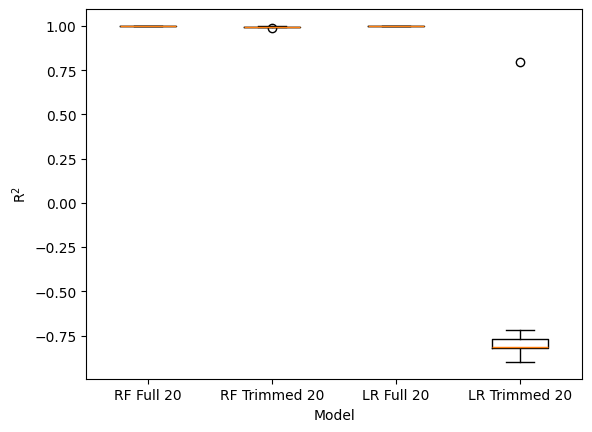

In [101]:
results = [r2_full_list, r2_trim_list, r2_full_list_lr, r2_trim_list_lr]

fig, ax = plt.subplots()
labels = ['RF Full 20', 'RF Trimmed 20', 'LR Full 20', 'LR Trimmed 20']
ax.set_ylabel(r'R$^{2}$')
ax.set_xlabel('Model')

bplot = ax.boxplot(results, tick_labels = labels, showfliers = True)

plt.show()

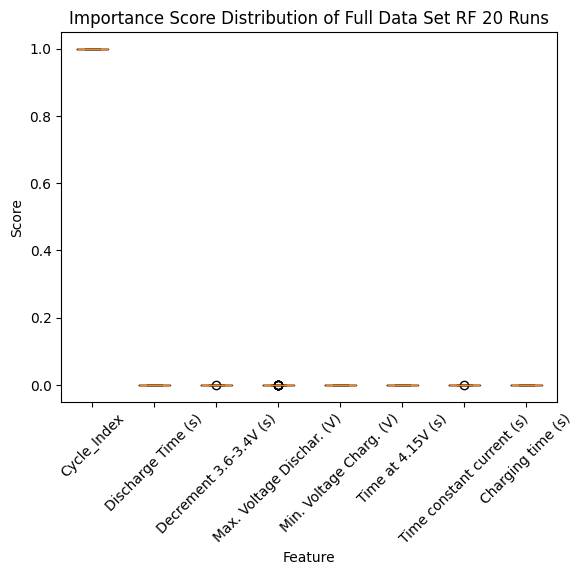

In [102]:
results = pd.DataFrame(data = importance_full_list, columns = X.columns.to_list())

fig, ax = plt.subplots()
ax.set_title('Importance Score Distribution of Full Data Set RF 20 Runs')
labels = X.columns.to_list()
ax.set_ylabel('Score')
ax.set_xlabel('Feature')
bplot = ax.boxplot(results, showfliers = True)
ax.set_xticklabels(labels = labels, rotation = 45)

plt.show()

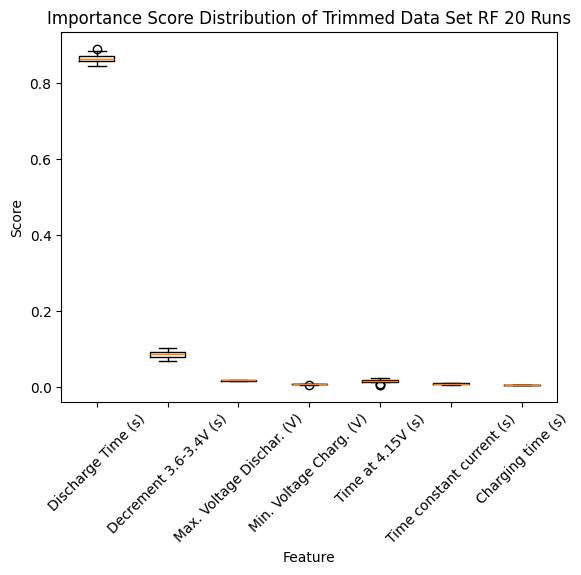

In [103]:
results = pd.DataFrame(data = importance_trim_list, columns = X_trim.columns.to_list())

fig, ax = plt.subplots()
ax.set_title('Importance Score Distribution of Trimmed Data Set RF 20 Runs')
labels = X_trim.columns.to_list()
ax.set_ylabel('Score')
ax.set_xlabel('Feature')
bplot = ax.boxplot(results, showfliers = True)
ax.set_xticklabels(labels = labels, rotation = 45)

plt.show()

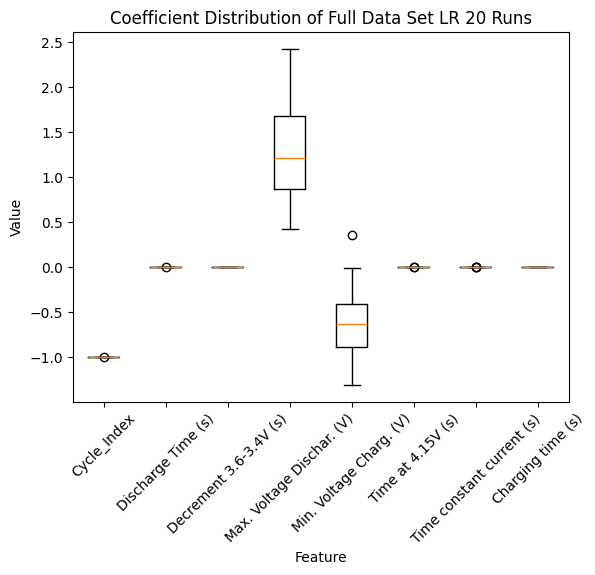

In [104]:
results = pd.DataFrame(data = coef_full_list, columns = X.columns.to_list())

fig, ax = plt.subplots()
ax.set_title('Coefficient Distribution of Full Data Set LR 20 Runs')
labels = X.columns.to_list()
ax.set_ylabel('Value')
ax.set_xlabel('Feature')
bplot = ax.boxplot(results, showfliers = True)
ax.set_xticklabels(labels = labels, rotation = 45)

plt.show()

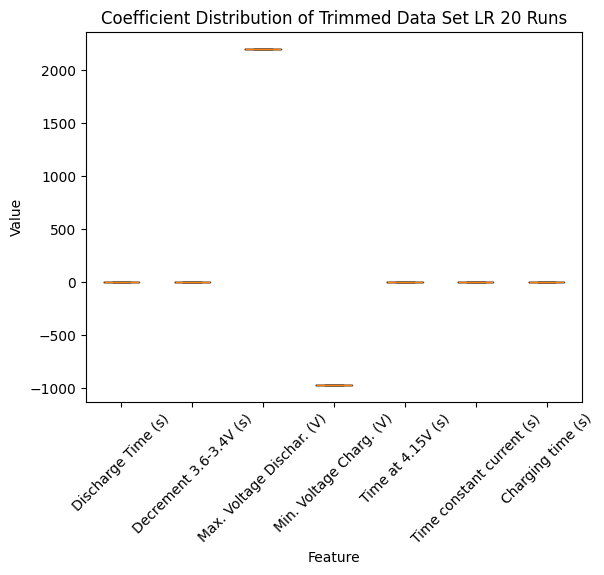

In [105]:
results = pd.DataFrame(data = coef_trim_list, columns = X_trim.columns.to_list())

fig, ax = plt.subplots()
ax.set_title('Coefficient Distribution of Trimmed Data Set LR 20 Runs')
labels = X_trim.columns.to_list()
ax.set_ylabel('Value')
ax.set_xlabel('Feature')
bplot = ax.boxplot(results, showfliers = True)
ax.set_xticklabels(labels = labels, rotation = 45)

plt.show()

Analyzing the resulting important scores from the RF models shows a large dependance on Cycle Index. Earlier this correlation was explained and therefore that feature being the most important is not of real interest. Through the ensemble of Random Forest runs the importance of Discharge Time remains high and therefore is likely a good predictor of Remaining Useful Life. 

As discussed earlier, approaching this from first principles should indicate this is an important characteristic as well as the end of life criteria is based on capacity retention. This value is directly related to the time spent within the discharge step. 

Interestingly, Charging Time is not shown to be a highly important feature. As the cell ages it is more difficult access lithium from each electrode due to the physical deterioration of the interfaces. Generally this is observed as an increase in polarization and is easily identified by adding electrochemical impedance spectroscopy routines to cycle life regimes. These in situ tests are very useful for characterizing the battery during use. If the polarization increased one would expect the discharge time /and/ charge time to both increase. 

As a battery scientist with many years of experience, both charge and discharge behavior are highly scrutinized during cycling. It is interesting that one side of the profile apparently deserves much higher scrutiny. What this tells us is that the main source of decay is likely occurring at the de-intercalation step at the anode (ions leaving the anode) or the re-intercalation step at the cathode (ions going into the cathode). This can be further interrogated with a suite of cells that include a third (reference) electrode allowing the working and counter electrodes to be observed independently.

There is a well known SEI layer on the anode that has been widely studied and this may suggest the ions are being impacted by transit through the SEI layer on the way back to the cathode. Alternatively, this could also imply there is a CEI layer developing on the cathode that is impacting the ion desolvation at that interface. These cells would benefit from post mortem analysis and results of that analysis be included here.

Furthermore, observing the application of Liner Regression to this data we can see that this data is not conducive to this type of analysis. Without Cycle Index as a feature, the Linear Regression model struggles to assign a fit and the associated fit coefficients do not make meaningful sense. However when Cycle Index is included, the R^2 of this model is quite accurate, but evidently highly dependent on what we know from first principles to be a direct indicator of life span. 

Although this data set provides a great resource for fitting models to battery data, there are several more interesting characteristics that would benefit the data set by their inclusion. These would include varied construction types, temperature resolved data, eis data for each cell at various points of life, notes on construction or lot information among other features. This is a great dataset for developing a basic model and shows the importance of understanding the underlying principles of the data when making such models. 